In [1]:
from IPython.display import Image

# 13. 텐서플로를 사용한 신경망 훈련
* 텐서플로를 사용하여 훈련 속도 향상
* 펜터플로의 Dataset API(tf.data)를 사용하여 입력 파이프라인과 효율적인 모델 훈련 구축
* 텐서플로를 사용하여 최적화된 머신러닝 코드 작성
* 텐서플로의 고수준 API로 다층 신경망 구축
* 인공 신경망을 위해 여러 가지 활성화 함수 선택
* 다양한 딥러닝 구조를 효율적으로 구현할 수 있는 텐서플로의 고수준 래퍼(wrapper) 케라스(tf.keras)

# 13.1 텐서플로와 훈련 성능
* 머신 러닝 작업 속도 향상

### 13.1.1 성능 문제
* GPU 사용
    * 그래픽 카드 = 컴퓨터 안에 포함된 작은 컴퓨터 클러스터
* GPU를 사용하기 위해 CUDA나 OpenCL에서 코드 작성해야하는데, 이는 머신러닝 알고리즘을 구현하고 실행하기에 편리한 환경이 아니다
    * 텐서플로는 이러한 환경을 제공해준다.


In [2]:
Image(url='https://git.io/JL5iw', width=800)

### 13.1.2 텐서플로란
* 머신 러닝 알고리즘을 구현하고 실행하기 위한 프로그래밍 인터페이스로, 확장이 용이하고 다양한 플랫폼을 지원한다.
* 딥러닝을 위한 간편한 인터페이스 포함
* 텐서플로는 머신 러닝 모델의 훈련 성능을 향상시키기 위해 CPU와 GPU 모두 활용 가능
    * CUDA 기반의 GPU 지원
    * GPU를 사용할 때 최대 성능
* 텐서플로는 일련의 노드로 구성된 계산 그래프를 만든다.
    * 각 노드는 0개 이상의 입력이나 출력을 가질 수 있는 연산을 표현
        * 이러한 연산의 입력과 출력을 참조하기 위한 심볼릭 핸들(symbolic handle)로 텐서가 만들어진다.
    * 텐서 = 스칼라 벡터, 행렬의 일반화 형태
        * 스칼라 = 랭크 0 텐서
        * 벡터 = 랭크 1 텐서
        * 행렬 = 랭크 2 텐서
        * 3차원 행렬 = 랭크 3 텐서

In [3]:
Image(url='https://git.io/JL5io', width=500)

* 텐서플로 버전
    * 1.x 버전: 데이터 흐름을 표현하는 정적인 유향 그래프(directed graph) 구성
        * 정적인 계산 그래프 사용이 어려움
    * 2.x 버전: 1.x버전을 개선하여 간단하게 신경망 모델을 만들고 훈련 가능
        * 정적인 계산 그래프를 지원하지만 더 많은 유연성을 가진 동적인 계산 그래프를 기본으로 사용

# 13.2 텐서플로 시작

### 13.2.2 텐서플로에서의 텐서

In [4]:
import tensorflow as tf
print('텐서플로 버전:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

텐서플로 버전: 2.7.0


In [5]:
# tf.convert_to_tensor: 리스트나 넘파이 배열에서 간단히 텐서로 바꿔준다.
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [6]:
tf.is_tensor(a), tf.is_tensor(t_a) # 텐서인지 확인

(False, True)

In [7]:
# 텐서가 참조하는 값을 얻기 위해 간단히 텐서의 .numpy() 메서드를 호출
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [8]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [9]:
# 상수 값을 가진 텐서
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


`tf.convert_to_tensor` 함수는 `tf.constant` 함수와 다르게 `tf.Variable`도 입력받을 수 있다. 이 외에 `tf.fill` 함수와 `tf.one_hot` 함수를 사용하여 텐서를 만들 수 있다.

* `tf.fill`: 원하는 스칼라 값으로 채워진 텐서를 만든다.
    * 첫 번째 매개변수 = 텐서의 크기
    * 두 번째 매개변수 = 채우고자 하는 스칼라값

In [10]:
tf.fill((2, 3), 1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

큰 사이즈의 텐서를 만들 때는 `tf.fill`이 `tf.ones`보다 효율적이다.

* `tf.one_hot`: 원-핫 인코딩 행렬을 만들어 주는 함수
    * 첫 번째 매개변수 = 원-핫 인코딩 위치를 나타내는 인덱스
    * 두 번째 매개변수 = 원-핫 인코딩 벡터의 길이
    * 만들어진 행렬의 크기 = 첫 번째 매개변수 길이 * 두 번째 매개변수

In [11]:
tf.one_hot([0, 1, 2], 4)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

텐서플로 2.4 버전부터 `tf.experimental.numpy` 모듈 아래에서 넘파이 호환 API를 제공한다.

### 13.2.3 텐서의 데이터 타입과 크기 조작
* 모델이나 연산에 맞는 입력을 준비하기 위한 텐서 조작

`tf.cast()`: 텐서의 데이터 타입을 원하는 타입으로 변경


In [12]:
t_a_new = tf.cast(t_a, tf.int64)
t_a_new

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

텐서플로의 어떤 연산은 특정 차원(랭크)의 입력 텐서를 필요로 한다. 차원은 원소의 크기와 관련이 있다. 따라서 텐서의 크기를 바꾸고 차원을 추가하거나 불필요한 차원을 제거할 수 있어야 한다.
이를 위한 `tf.transpose()`, `tf.reshape()`, `tf.squeeze()`와 같은 함수(또는 연산) 제공

In [13]:
# tf.transpose(): 텐서 전치
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


In [14]:
# tf.reshape(): 텐서 크기 바꾸기(1D 벡터 -> 2D 배열)
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
t_reshape.shape

TensorShape([5, 6])

In [15]:
# tf.squeeze(): 불필요한 차원 삭제(크기가 1인 차원은 불필요)
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


### 13.2.4 텐서에 수학 연산 적용


In [16]:
tf.random.set_seed(1)
# [-1, 1) 사이의 균등 분포
t1 = tf.random.uniform(shape=(5, 2),
                       minval=-1.0,
                       maxval=1.0)

# 표준 정규 분포
t2 = tf.random.normal(shape=(5, 2),
                      mean=0.0,
                      stddev=1.0)

In [17]:
# 크기가 같은 텐서의 원소별 곱셈
# tf.multiply()
t3 = tf.multiply(t1, t2).numpy()
t3

array([[-0.27 , -0.874],
       [-0.017, -0.175],
       [-0.296, -0.139],
       [-0.727,  0.135],
       [-0.401,  0.004]], dtype=float32)

In [18]:
# tf.math.reduce_mean(): 특정 축(들)을 따라 평균 계산
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [19]:
# tf.math.reduce_sum(): 특정 축(들)을 따라 합
t5 = tf.math.reduce_sum(t1)
print(t5)

tf.Tensor(1.4849124, shape=(), dtype=float32)


In [20]:
# tf.math.reduce_std(): 특정 축(들)을 따라 표준 편차
t6 = tf.math.reduce_std(t1)
print(t6)

tf.Tensor(0.4776839, shape=(), dtype=float32)


In [21]:
# tf.linalg.matmul(): t1과 t2의 행렬 곱셈
# t1 * t2^T(t2 전치)
t7 = tf.linalg.matmul(t1, t2, transpose_b=True)
t7.numpy()

array([[-1.144,  1.115, -0.87 , -0.321,  0.856],
       [ 0.248, -0.191,  0.25 , -0.064, -0.331],
       [-0.478,  0.407, -0.436,  0.022,  0.527],
       [ 0.525, -0.234,  0.741, -0.593, -1.194],
       [-0.099,  0.26 ,  0.125, -0.462, -0.396]], dtype=float32)

In [22]:
# t1^T(t1 전치) * t2
t8 = tf.linalg.matmul(t1, t2, transpose_a=True)
t8.numpy()

array([[-1.711,  0.302],
       [ 0.371, -1.049]], dtype=float32)

In [23]:
# tf.norm(): 텐서의 L^p 노름 계산
# t1의 노름 L^2 계산
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
norm_t1

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

In [24]:
# t1의 L^2 노름 계산 확인
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

넘파이 함수들은 입력 매수변수를 처리하기 전에 해당 객체의 `__array__()` 메서드를 호출한다. 이를 통해 넘파이 호환성을 가진 객체를 만들 수 있다. 예를 들어 판다스의 `Series` 객체를 넘파이 API에 사용할 수 있다. 마찬가지로 텐서에도 이 메서드가 구현되어 있기 때문에 넘파이 함수에 텐서를 입력으로 사용할 수 있다.

많은 수학 함수는 최상위 수준에서 참도가 가능하다. 예를 들어 `tf.multiply()`, `tf.reduce_mean()`, `tf.reduce_sum()`, `tf.matmul()`처럼 사용할 수 있다. 파이썬 3.5 버전부터는 @ 연산자를 사용하여 행렬 연산을 수행할 수 있다.

In [25]:
t1 @ tf.transpose(t2)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.144,  1.115, -0.87 , -0.321,  0.856],
       [ 0.248, -0.191,  0.25 , -0.064, -0.331],
       [-0.478,  0.407, -0.436,  0.022,  0.527],
       [ 0.525, -0.234,  0.741, -0.593, -1.194],
       [-0.099,  0.26 ,  0.125, -0.462, -0.396]], dtype=float32)>

텐서플로 2.4 버전부터 `tf.experimental.numpy` 모듈 아래에서 넘파이 호환 API를 제공.

이 API는 넘파이 1.16 버전을 기반으로 한다.

In [26]:
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

tn1 = tnp.array(t1)
tn2 = tnp.array(t2)
print(tnp.dot(tn1, tn2.T))

tf.Tensor(
[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]], shape=(5, 5), dtype=float32)


### 13.2.5 split(), stack(), concat() 함수
* 여러 개의 텐서를 쌓거나 연결하여 하나의 텐서로 만드는 연산

* tf.split(): 하나의 텐서에서 두 개 이상의 텐서로 나누는 함수
    * 입력된 텐서를 동일한 크기의 텐서 리스트로 나눈다.
    * num_or_size_splits 매개변수에 분할할 텐서 개수를 지정하고 axis 매개변수로 원하는 차원을 지정할 수 있다. 또는 리스트로 원하는 크기 전달도 가능.

In [27]:
# 분할 개수 지정
tf.random.set_seed(1)
t = tf.random.uniform((6, ))
print(t.numpy())

t_splits = tf.split(t, 3)
[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [28]:
# 다른 분할 크기 전달
# 분할 개수 대신 출력 텐서의 크기를 직접 지정 가능
# 크기 5인 텐서를 3과 2인 텐서로 나눈다
tf.random.set_seed(1)
t = tf.random.uniform((5,))
print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [29]:
# 크기가 3이고 1로 채워진 1D 텐서 A
# 크기가 2이고 0으로 채워진 2D 텐서 B
# 두 텐서를 연결하여 크기가 5인 텐서 C
A = tf.ones((3, ))
B = tf.zeros((2, ))

C = tf.concat([A, B], axis=0)
C.numpy()

array([1., 1., 1., 0., 0.], dtype=float32)

In [30]:
# 텐서 A와 B의 크기가 모두 3이라면 두 텐서를 쌓아서 2D 텐서 S를 만들 수 있다.
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
S.numpy()

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# 13.3 텐서플로 데이터셋 API(tf.data)를 사용하여 입력 파이프라인 구축
* 데이터셋이 컴퓨터 메모리보다 클 경우
    * 저장 장치에서 데이터를 나누어 배치 단위로 적재
    * 데이터 변환하거나 전처리 단계를 수행하기 위한 데이터 처리 파이프라인


### 13.3.1 텐서에서 텐서플로 데이터셋 만들기


In [31]:
# 데이터셋 만들기
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
ds

<TensorSliceDataset shapes: (), types: tf.float32>

In [32]:
for i in ds:
    print(i)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [33]:
# 데이터셋에서 배치 크기 3의 배치 만들기
ds_batch = ds.batch(3)

for i, v in enumerate(ds_batch):
    print('batch {}:'.format(i+1), v.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


`batch()` 메서드에는 텐서의 원소 개수가 배치 크기로 나누어 떨어질 때 사용할 수 있는 drop_remainder 매개변수가 있다.
drop_remainder 매개변수의 기본값은 False 이다.


### 13.3.2 두 개의 텐서를 하나의 데이터셋으로 연결하기
데이터는 두 개(또는 그 이상)의 텐서로 구성된다. 예를 들어 특성을 위한 텐서와 레이블을 위한 텐서가 있다. 이런 경우 이 텐서를 연결하여 하나의 데이터셋으로 만들면 두 텐서의 원소를 튜플로 추출할 수 있다.

In [34]:
# t_x: 세 개의 특성
# t_y: 클래스 레이블
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

print(t_x)
print(t_y)

tf.Tensor(
[[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]
 [0.605 0.637 0.614]], shape=(4, 3), dtype=float32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)


In [35]:
# 방법 1
# 두 텐서를 연결하여 데이터셋을 만든다.
# 두 텐서의 원소는 1:1 대응이 되어야 한다.
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for x, y in ds_joint:
    print('  x: ', x.numpy(), 
          '  y: ', y.numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [36]:
# 방법 2
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for x, y in ds_joint:
    print('  x: ', x.numpy(), 
          '  y: ', y.numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


자주 발생하는 에러는 원본 특성(x)과 레이블(y) 사이의 원소 간 대응이 깨지는 경우이다(ex, 두 데이터셋을 따로 섞는 경우). 하지만 하나의 데이터셋으로 합치면 샘플을 섞어도 안전하다.

* 데이터셋의 각 원소에 변환 적용

In [37]:
# ds_joint 데이터셋을 사용해서 특성 값의 범위를 [-1, 1)로 조정
# 현재 t_x 값은 균등 분포를 기반으로 [0, 1) 범위를 가지고 있다.
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for x, y in ds_trans:
    print('  x: ', x.numpy(), 
          '  y: ', y.numpy())

  x:  [-0.67   0.803  0.262]   y:  0
  x:  [-0.131 -0.416  0.285]   y:  1
  x:  [ 0.952 -0.13   0.32 ]   y:  2
  x:  [0.21  0.273 0.229]   y:  3


### 13.3.3 shuffle(), batch(), repeat() 메서드


In [38]:
tf.random.set_seed(1)
# 데이터 섞기
ds = ds_joint.shuffle(buffer_size=len(t_x))

for x, y in ds:
    print('  x: ', x.numpy(), 
          '  y: ', y.numpy())

  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


x와 y 원소 간의 일대일 대응을 깨뜨리지 않고 행을 섞을 수 있다. shuffle() 메서드는 섞기 저에 데이터셋에서 얼마나 많은 원소를 꺼낼 것인지 결정하는 `buffer_size` 매개변수가 필요하다. 버퍼에 있는 원소는 랜덤하게 추출되고 빈자리는 (섞여 있지 않은) 원본 데이터셋의 다음 원소로 채워진다. 따라서 buffer_size의 값을 작게 설정하면 데이터셋을 완전히 섞지 않을 수 있다.

데이터셋이 작을 때 비교적 작은 buffer_size를 선택하면 데이터셋이 완전히 랜덤하게 섞이지 않기 때문에 신경망 예측 성능에 부정적인 영향을 끼칠 수 있다.

완전히 섞이게 하기 위해서는 훈련 샘플의 개수와 동일한 버퍼 크기를 지정하면 된다.

In [39]:
# ds_joint 데이터셋에서 배치를 만들고 어떻게 구성되는지 확인
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))

print('배치 x: \n', batch_x.numpy())
print('배치 y:   ', batch_y.numpy())

배치 x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
배치 y:    [0 1 2]


In [40]:
# 여러 에포크동안 모델을 훈련할 때 필요한 에포크 횟수만큼 데이터셋을 섞어 추출해야 한다.
# 배치 데이터셋을 두 번 반복 - 각 배치가 두 번 출력
ds = ds_joint.batch(3).repeat(count=2)
for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [41]:
# 배치와 반복 연산의 순서를 바꾸면 결과가 달라진다.
ds = ds_joint.repeat(count=2).batch(2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i,batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]


In [42]:
tf.random.set_seed(1)

# 순서 1: shuffle() -> batch() -> repeat()
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i,batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [43]:
tf.random.set_seed(1)

## 순서 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]
6 (2, 3) [1 3]
7 (2, 3) [2 0]
8 (2, 3) [1 2]
9 (2, 3) [3 0]
10 (2, 3) [3 0]
11 (2, 3) [2 1]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [3 0]
15 (2, 3) [2 1]
16 (2, 3) [2 3]
17 (2, 3) [0 1]
18 (2, 3) [1 2]
19 (2, 3) [0 3]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [3 2]
23 (2, 3) [0 1]
24 (2, 3) [3 0]
25 (2, 3) [1 2]
26 (2, 3) [1 3]
27 (2, 3) [2 0]
28 (2, 3) [2 1]
29 (2, 3) [0 3]
30 (2, 3) [2 3]
31 (2, 3) [0 1]
32 (2, 3) [3 1]
33 (2, 3) [2 0]
34 (2, 3) [3 2]
35 (2, 3) [1 0]
36 (2, 3) [3 0]
37 (2, 3) [2 1]
38 (2, 3) [0 2]
39 (2, 3) [3 1]


In [44]:
tf.random.set_seed(1)

# 순서 2: batch() -> shuffle() -> repeat()
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [45]:
tf.random.set_seed(1)

# 순서 2: batch() -> shuffle() -> repeat()
ds = ds_joint.batch(2).shuffle(4).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]
6 (2, 3) [2 3]
7 (2, 3) [0 1]
8 (2, 3) [2 3]
9 (2, 3) [0 1]
10 (2, 3) [2 3]
11 (2, 3) [0 1]
12 (2, 3) [2 3]
13 (2, 3) [0 1]
14 (2, 3) [2 3]
15 (2, 3) [0 1]
16 (2, 3) [0 1]
17 (2, 3) [2 3]
18 (2, 3) [2 3]
19 (2, 3) [0 1]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [2 3]
23 (2, 3) [0 1]
24 (2, 3) [2 3]
25 (2, 3) [0 1]
26 (2, 3) [2 3]
27 (2, 3) [0 1]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [0 1]
31 (2, 3) [2 3]
32 (2, 3) [2 3]
33 (2, 3) [0 1]
34 (2, 3) [2 3]
35 (2, 3) [0 1]
36 (2, 3) [2 3]
37 (2, 3) [0 1]
38 (2, 3) [0 1]
39 (2, 3) [2 3]


In [46]:
tf.random.set_seed(1)

# 순서 3: batch() -> repeat() -> shuffle()
ds = ds_joint.batch(2).repeat(3).shuffle(4)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [0 1]
2 (2, 3) [2 3]
3 (2, 3) [2 3]
4 (2, 3) [0 1]
5 (2, 3) [2 3]


### 13.3.4 로컬 디스크에 있는 파일에서 데이터셋 만들기

* tf.io: 이미지 파일 읽기
* tf.image: 이미지 콘텐츠를 디코딩하고 이미지 크기 변경

In [47]:
!mkdir cat_dog_images
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-01.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-02.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-03.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/dog-01.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/dog-02.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/dog-03.jpg
!mv *.jpg cat_dog_images/

mkdir: cannot create directory ‘cat_dog_images’: File exists
--2022-02-01 15:55:22--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139707 (136K) [image/jpeg]
Saving to: ‘cat-01.jpg’

cat-01.jpg          100%[===================>] 136.43K  --.-KB/s    in 0.03s   

2022-02-01 15:55:23 (4.80 MB/s) - ‘cat-01.jpg’ saved [139707/139707]

--2022-02-01 15:55:23--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.

In [48]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


이미지 크기: (900, 1200, 3)
이미지 크기: (900, 1200, 3)
이미지 크기: (900, 742, 3)
이미지 크기: (800, 1200, 3)
이미지 크기: (800, 1200, 3)
이미지 크기: (900, 1200, 3)


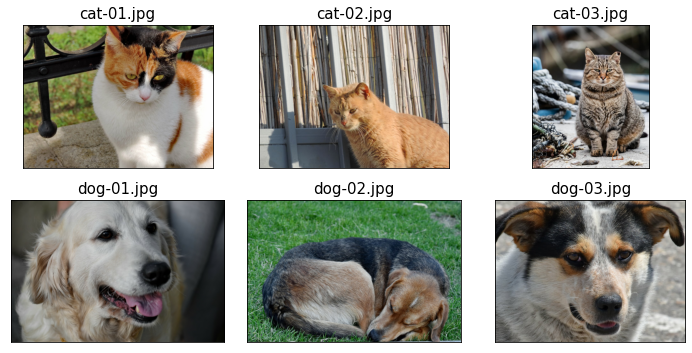

In [49]:
# 이미지 출력
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10, 5))
for i, f in enumerate(file_list):
    img_raw = tf.io.read_file(f)
    img = tf.image.decode_image(img_raw)
    print('이미지 크기:', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(f), size=15)

plt.tight_layout()
plt.show()

이미지의 shape(가로, 세로 비율 = 데이터 배열 크기)를 보면 이미지 크기가 몇 개 다른 것을 알 수 있다.

In [50]:
# 레이블 확인
# 파일 이름 안에 레이블이 포함되어 있다.
# 1은 강아지, 0은 고양이
labels = [1 if 'dog' in os.path.basename(f) else 0 for f in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [51]:
# 두 개의 텐서를 연결하여 데이터셋 만들기
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for f, l in ds_files_labels:
    print(f.numpy(), l.numpy())

b'cat_dog_images/cat-01.jpg' 0
b'cat_dog_images/cat-02.jpg' 0
b'cat_dog_images/cat-03.jpg' 0
b'cat_dog_images/dog-01.jpg' 1
b'cat_dog_images/dog-02.jpg' 1
b'cat_dog_images/dog-03.jpg' 1


(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


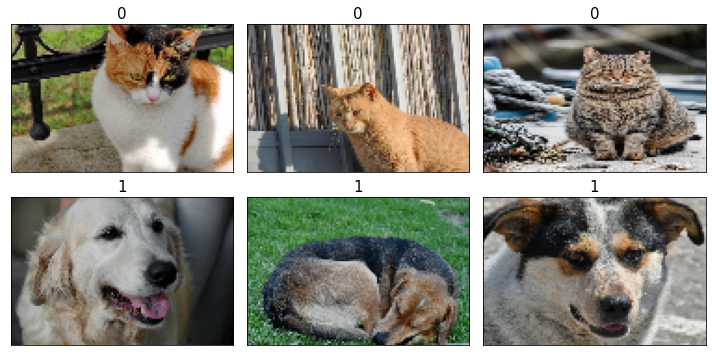

In [52]:
# 데이터셋 변환 적용
# 파일 경로에서 이미지를 로드하고 원본 데이터를 디코딩 한 후
# 원하는 크기로 변경
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i, e in enumerate(ds_images_labels):
    print(e[0].shape, e[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(e[0])
    ax.set_title('{}'.format(e[1].numpy()), 
                 size=15)

plt.tight_layout()
plt.show()

### 13.3.5 tensorflow_datasets 라이브러리에서 데이터셋 로드


In [53]:
!pip install --upgrade tensorflow-datasets

In [54]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

1035
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


가능한 데이터셋을 보여준다.

* 데이터셋을 내려 받는 방법
    * 첫 번째 방법
        1. 데이터셋의 builder() 함수 호출
        2. download_and_prepare() 메서드 실행
        3. as_dataset() 메서드 호출
        

In [55]:
# CelebA 데이터셋
celeba_bldr = tfds.builder("celeb_a")

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

* 데이터셋 구조
    * 특성: 'image', 'landmarks', 'attributes' 세 개의 키로 가진 딕셔너리로 저장
    * 'image': 유명 인사의 얼굴 이미지
    * 'landmarks': 얼굴에서 추출한 위치로 구성된 딕셔너리
        * 눈, 코 등의 위치
    * 'abbtibutes': 이미지에 있는 사람의 얼굴 속성
        * 얼굴 표정, 화장, 머리카락 특징

In [56]:
celeba_bldr.download_and_prepare() # celecb_a 데이터셋 다운로드에 문제가 있음.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: ignored

In [57]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)
dict_keys(['test', 'train'])


(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


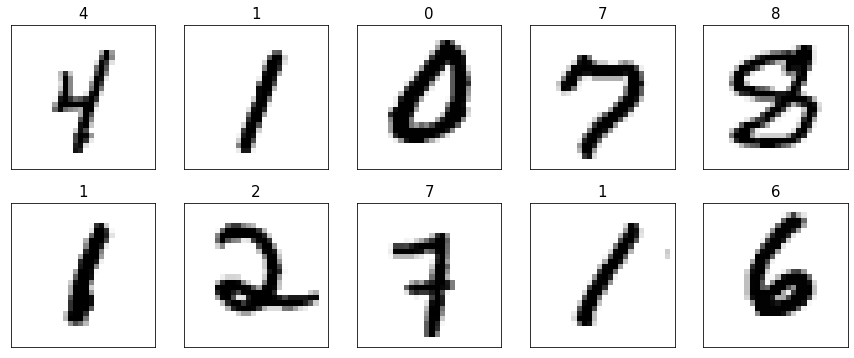

In [58]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: (item['image'], item['label']))
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
plt.show()